<a href="https://colab.research.google.com/github/ctrlv27/java.scripting/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset
data = 'Housing.csv'
df = pd.read_csv(data)
df.head(5)
df.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000.0,3000,2,1.0,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150.0,2400,3,1.0,1,no,no,no,no,no,0,no,semi-furnished
542,1750000.0,3620,2,1.0,1,yes,no,no,no,no,0,no,unfurnished
543,1750000.0,2910,3,1.0,1,no,no,no,no,no,0,no,furnished
544,1750000.0,3850,3,1.0,2,yes,no,no,no,no,0,no,unfurnished


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.440000e+02,545.000000,545.000000,543.000000,545.000000,545.000000
mean,4.760855e+06,5150.541284,2.965138,1.285451,1.805505,0.693578
std,1.867122e+06,2170.141023,0.738064,0.502310,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.shape

(545, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             544 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         543 non-null    float64
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         544 non-null    object 
 7   basement          544 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   544 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  544 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 55.5+ KB


In [8]:
df['basement'].value_counts()

basement
no     354
yes    190
Name: count, dtype: int64

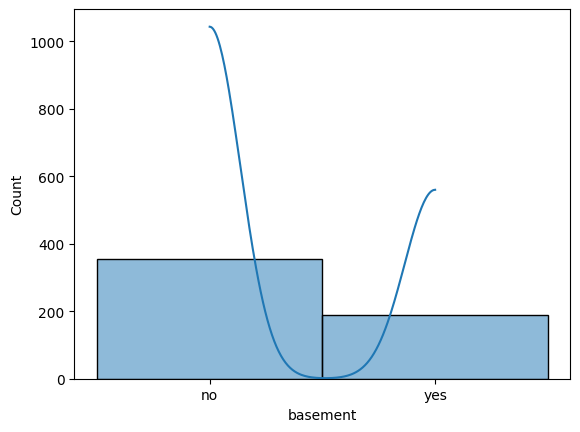

In [9]:
sns.histplot(df['basement'], kde=True)
plt.show()

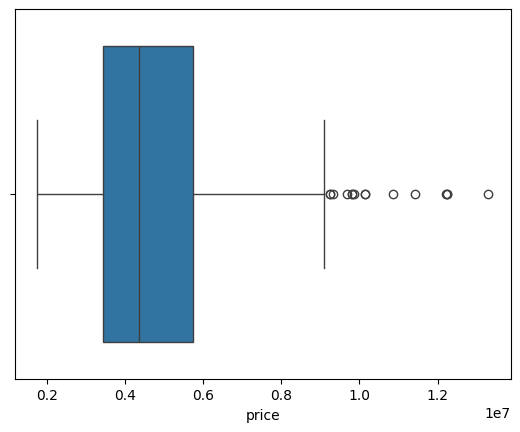

In [10]:
sns.boxplot(x='price',data=df)
plt.show()

In [14]:
#Select only the numeric columns
numeric_df=df.select_dtypes(include=['number'])

#Perform the comparison on numeric columns
(numeric_df<0).sum()

price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64

In [15]:
df.isnull().sum()

price               1
area                0
bedrooms            0
bathrooms           2
stories             0
mainroad            0
guestroom           1
basement            1
hotwaterheating     0
airconditioning     1
parking             0
prefarea            0
furnishingstatus    1
dtype: int64

In [16]:
df.isna().sum()

price               1
area                0
bedrooms            0
bathrooms           2
stories             0
mainroad            0
guestroom           1
basement            1
hotwaterheating     0
airconditioning     1
parking             0
prefarea            0
furnishingstatus    1
dtype: int64

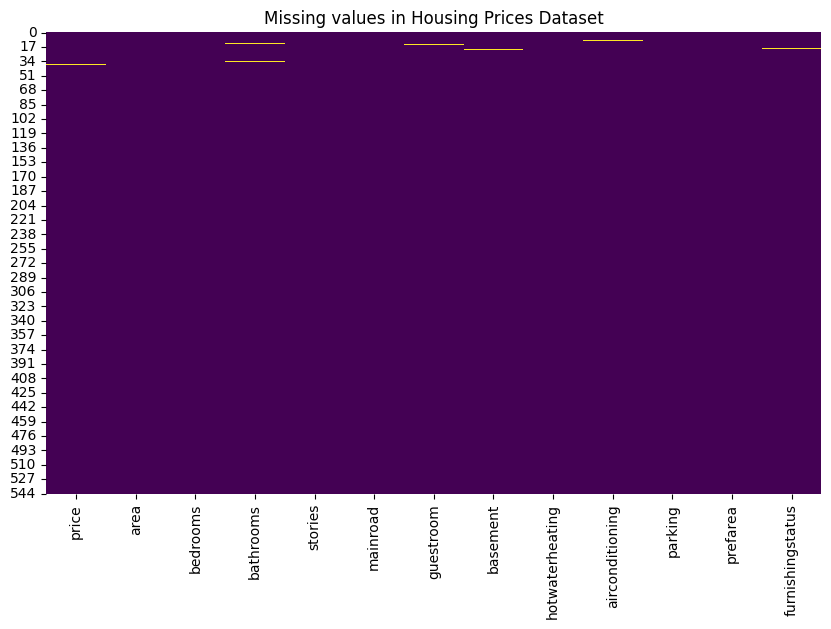

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title('Missing values in Housing Prices Dataset')
plt.show()

In [21]:
for col in ['mainroad','guestroom','basement','airconditioning','prefarea','furnishingstatus']:
  #Removed empty strings
  df[col]=df[col].astype('category').cat.codes
  df.head(5)
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             544 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         543 non-null    float64
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int8   
 6   guestroom         545 non-null    int8   
 7   basement          545 non-null    int8   
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    int8   
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  544 non-null    object 
dtypes: float64(2), int64(4), int8(4), object(3)
memory usage: 40.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column  

In [22]:
single_value_columns = df.nunique() == 1

#Check if any column has a single unique value
if single_value_columns.any():
  print("Yes, the dataset contains columns with unique single value")
  print("Colums with a unique single value:",df.columns[single_value_columns].tolist())

else:
  print("No, the dataset does not contain any columns with a unique single value")

No, the dataset does not contain any columns with a unique single value


In [23]:
df = df.drop(columns=['stories'])
df.head(5)

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420,4,2.0,1,1,1,no,2,2,1,0
1,12250000.0,8960,4,4.0,1,1,1,no,2,3,0,0
2,12250000.0,9960,3,2.0,1,1,2,no,1,2,1,1
3,12215000.0,7500,4,2.0,1,1,2,no,2,3,1,0
4,11410000.0,7420,4,1.0,1,2,2,no,2,2,0,0


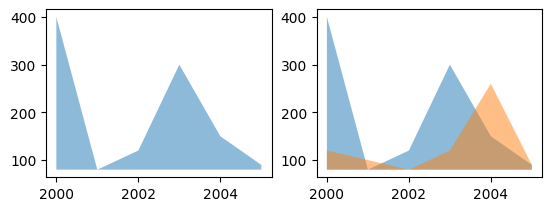

In [32]:
import matplotlib.pyplot as plt
year=[2000,2001,2002,2003,2004,2005]
itemA=[400,80,120,300,150,90]
itemB=[120,100,80,120,260,90]
plt.subplot(221)

plt.fill_between(year, min(itemA), itemA, alpha=0.5)
plt.subplot(222)
plt.fill_between(year, min (itemA), itemA, alpha=0.5)
plt.fill_between (year, min (itemB), itemB, alpha=0.5)
plt.show()